<a href="https://colab.research.google.com/github/25stu0220-sys/opencv-guide/blob/main/opencv_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

오픈cv를 활용해서 인터넷에서 다운받은 사진을 바탕 화면에 저장했고 이 데이터를 입력 받아서 오픈cv로 이미지 인식이 되는 걸 코랩에서 실행을 하고 싶어. 코드를 만들어줘

Saving 앙리 2.webp to 앙리 2.webp


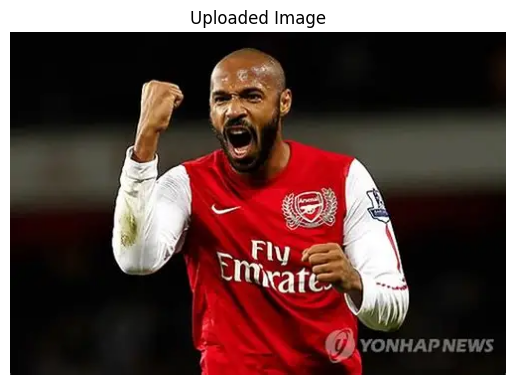

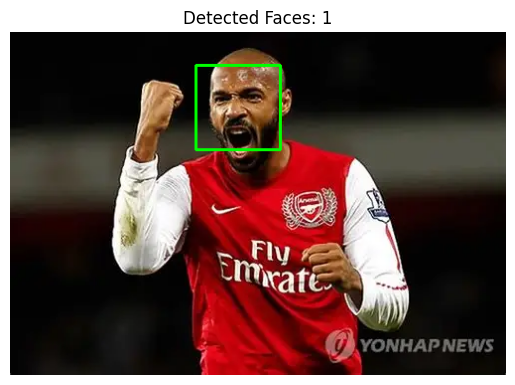

In [2]:
# ✅ 1️⃣ OpenCV 설치
!pip install opencv-python

# ✅ 2️⃣ Colab에 이미지 업로드
from google.colab import files
uploaded = files.upload()  # 👉 바탕화면에 있는 이미지 파일 선택

# 업로드한 파일 이름 확인
import io
import cv2
import numpy as np
from IPython.display import Image, display

# ✅ 3️⃣ 업로드된 파일을 읽기
filename = list(uploaded.keys())[0]  # 첫 번째 업로드 파일 이름 가져오기
image = cv2.imdecode(np.frombuffer(uploaded[filename], np.uint8), cv2.IMREAD_COLOR)

# ✅ 4️⃣ 이미지 출력 (BGR → RGB 변환)
import matplotlib.pyplot as plt

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Uploaded Image')
plt.show()

# ✅ 5️⃣ 간단한 이미지 인식 예제 — 얼굴 인식
# OpenCV의 Haar Cascade 분류기 사용
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# 얼굴 위치 표시
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# 결과 출력
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f'Detected Faces: {len(faces)}')
plt.show()
